# Spark

Apache's framework for distributed processing

- Initialisation Process

- basic dice exemple

---

## guide


nous vle konnen exactement mete en claire concept poun kember yo poun k travay avec spark.

The first thing a Spark program must do is to create a SparkContext object, which tells Spark how to access a cluster. To create a SparkContext you first need to build a SparkConf object that contains information about your application.

The appName parameter is a name for your application to show on the cluster UI. master is a Spark, Mesos or YARN cluster URL, or a special “local” string to run in local mode. In practice, when running on a cluster, you will not want to hardcode master in the program, but rather launch the application with spark-submit and receive it there. However, for local testing and unit tests, you can pass “local” to run Spark in-process.


> Heuresment pou nous msambler jwenn deux methode pou demarrer Spark sou machine la.

Fok nous set driver/host computer a.



key concepts for Spark:

- RDD
- transformer
- action




In [ ]:
from pyspark import SparkContext, SparkConf
master="local[3]"
appName="datamining-spark"
conf = SparkConf().set("spark.driver.host","127.0.0.1").setAppName(appName).setMaster(master)
sc = SparkContext(conf=conf)

# That would work: SparkSession.builder.config('spark.driver.host', '127.0.0.1').getOrCreate()


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .config('spark.driver.host', '127.0.0.1') \
    .master("local[1]") \
    .appName("Word Count") \
    .getOrCreate()

sparkSc = spark.sparkContext

## Nou pral demarrer exemple Dice la.

In [ ]:
import random as rd 
n = 100
rd.seed(1)
simulations = range(100)



- SC cluster/context

In [ ]:
headsc = (sc.parallelize(simulations)
        .map(lambda _: rd.random())
        .filter(lambda dice: dice<0.2)
        .count()
    )

In [ ]:
print(headsc)
tails = n -headsc
ratio = headsc / n
print(f'number of tails: {tails}', f'ratio: {ratio}')

- sparkSc cluster/context

In [ ]:
hsp = (sparkSc.parallelize(simulations)
        .map(lambda _: rd.random())
        .filter(lambda dice: dice<0.3)
        .count()
    )

print(hsp)
t = n -hsp
rat = hsp / n
print(f'number of tails: {t}', f'ratio: {rat}')


In [ ]:
#sparkSc.stop()
#sc.stop()

## Map VS FlatMap

---

In [ ]:
%%writefile input.txt
Hello world
Another line
Yet another line
The last line

In [ ]:
from pyspark import SparkContext, SparkConf
mast="local[2]"
Name="mapVSflatmap"
con = SparkConf().set("spark.driver.host","127.0.0.1").setAppName(Name).setMaster(mast)
spC = SparkContext(conf=con)

In [ ]:
# we can get access to the inut.txt
spC.textFile("./input.txt")\
    .map(lambda x: x.split()) \
        .collect()

In [ ]:
spC.textFile("./input.txt")\
    .flatMap(lambda x: x.split()) \
        .collect()

In [ ]:
#spC.stop()

## PairRDD

---

In [1]:
from pyspark import SparkContext, SparkConf
Mastery="local"
NameApp="PairRDD"
conn = SparkConf().set("spark.driver.host","127.0.0.1").setAppName(NameApp).setMaster(Mastery)
sconn = SparkContext(conf=conn)

In [30]:
%%writefile sales.txt
#ID DATE        STORE  PRODUCT AMOUNT
100 12/13/2001  34     G345   375.43
103 12/13/2004  31     H325   375.90
 10 12/13/2011   3     O145    23.00
100 12/13/2001  34     P345   375.43
103 12/13/2004  31     Y325   375.90
 10 12/13/2011   3     N145    23.00

Overwriting sales.txt


In [19]:
sconn.textFile("./sales.txt")\
    .take(2)

['#ID DATE        STORE  PRODUCT AMOUNT',
 '100 12/13/2001  34     G345   375.43']

In [20]:
sconn.textFile("./sales.txt")\
    .top(2)

['103 12/13/2004  31     Y325   375.90',
 '103 12/13/2004  31     H325   375.90']

In [21]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
    .take(2)

[['#ID', 'DATE', 'STORE', 'PRODUCT', 'AMOUNT'],
 ['100', '12/13/2001', '34', 'G345', '375.43']]

In [22]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
    .take(2)

[['100', '12/13/2001', '34', 'G345', '375.43'],
 ['103', '12/13/2004', '31', 'H325', '375.90']]

In [23]:
sconn.textFile("./sales.txt")\
    .flatMap(lambda x: x.split()) \
        .filter(lambda x: not x.startswith('#'))\
    .collect()

['DATE',
 'STORE',
 'PRODUCT',
 'AMOUNT',
 '100',
 '12/13/2001',
 '34',
 'G345',
 '375.43',
 '103',
 '12/13/2004',
 '31',
 'H325',
 '375.90',
 '10',
 '12/13/2011',
 '3',
 'O145',
 '23.00',
 '100',
 '12/13/2001',
 '34',
 'P345',
 '375.43',
 '103',
 '12/13/2004',
 '31',
 'Y325',
 '375.90',
 '10',
 '12/13/2011',
 '3',
 'N145',
 '23.00']

In [24]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
        .map(lambda x: x[-1])\
    .collect()

['375.43', '375.90', '23.00', '375.43', '375.90', '23.00']

In [25]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
        .map(lambda x: float(x[-1]))\
    .sum()

1548.6599999999999

In [32]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
            .map(lambda x: (x[-5],float(x[-1])))\
                .reduceByKey(lambda amount1,amount2: amount1+amount2)\
                    .collect()

[('100', 750.86), ('103', 751.8), ('10', 46.0)]

In [33]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
            .map(lambda x: (x[-5],float(x[-1])))\
                .reduceByKey(lambda amount1,amount2: amount1+amount2)\
                    .sortBy(lambda product: product[-2],ascending=False)\
                        .collect()

[('103', 751.8), ('100', 750.86), ('10', 46.0)]

In [35]:
sconn.textFile("./sales.txt")\
    .map(lambda x: x.split()) \
        .filter(lambda x: not x[0].startswith('#'))\
            .map(lambda x: (x[-5],float(x[-1])))\
                .reduceByKey(lambda amount1,amount2: amount1+amount2)\
                    .sortBy(lambda product: product[-2],ascending=False)\
                        .map(lambda x: x[1])\
                            .mean()

516.2199999999999

In [36]:
sconn.textFile("./input.txt")\
    .flatMap(lambda line: line.split())\
        .map(lambda word: (word, 1))\
            .reduceByKey(lambda count1,count2: count1+count2)\
                .collect()

[('Hello', 1),
 ('world', 1),
 ('Another', 1),
 ('line', 3),
 ('Yet', 1),
 ('another', 1),
 ('The', 1),
 ('last', 1)]

In [ ]:
#sconn.stop()

## Spark ML

----

1. data munging
2. spark ml 
3. chain spark ml transformers and estimators composing an ml pipeline

In [9]:
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import functions as F
newMastery="local[4]"
newNameApp="ML.pipelines"
newconn = SparkConf().set("spark.driver.host","127.0.0.1").setAppName(newNameApp).setMaster(newMastery)
sml = SparkContext(conf=newconn).getOrCreate()

In [11]:
sqlCon = SQLContext(sml)
#  in order to use the sql functions

Text(0.5, 1.0, 'Apple Socks')

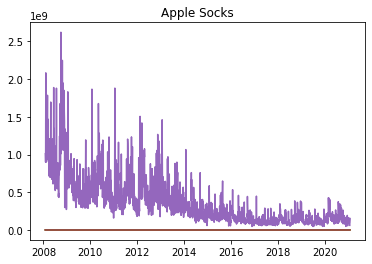

In [12]:
# get some apple stock
from datetime import datetime
from pandas_datareader.data import DataReader
from matplotlib.pyplot import plot, title
%matplotlib inline

dt_start = datetime(2008, 2,1)
dt_end = datetime(2021, 2,1)

appleData = DataReader('AAPL', data_source = 'yahoo', start = dt_start, end= dt_end)

plot(appleData)
title("Apple Socks")

In [13]:
appleData

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-02-01,4.878214,4.720714,4.865714,4.776786,1.010744e+09,4.120698
2008-02-04,4.853571,4.693571,4.793214,4.701786,8.992340e+08,4.055998
2008-02-05,4.785714,4.603571,4.658214,4.620000,1.141042e+09,3.985445
2008-02-06,4.711429,4.348929,4.672500,4.357143,1.573272e+09,3.758692
2008-02-07,4.456429,4.188214,4.284643,4.330000,2.083332e+09,3.735277
...,...,...,...,...,...,...
2021-01-20,132.490005,128.550003,128.660004,132.029999,1.043195e+08,132.029999
2021-01-21,139.669998,133.589996,133.800003,136.869995,1.205295e+08,136.869995
2021-01-22,139.850006,135.020004,136.279999,139.070007,1.139072e+08,139.070007


In [14]:
df_aapl = sqlCon.createDataFrame(appleData)
df_aapl.show(1)

+-----------------+-----------------+-----------------+-----------------+----------+-----------------+
|             High|              Low|             Open|            Close|    Volume|        Adj Close|
+-----------------+-----------------+-----------------+-----------------+----------+-----------------+
|4.878213882446289|4.720714092254639|4.865714073181152|4.776785850524902|1.010744E9|4.120697975158691|
+-----------------+-----------------+-----------------+-----------------+----------+-----------------+
only showing top 1 row



In [15]:
df_aapl.schema

StructType(List(StructField(High,DoubleType,true),StructField(Low,DoubleType,true),StructField(Open,DoubleType,true),StructField(Close,DoubleType,true),StructField(Volume,DoubleType,true),StructField(Adj Close,DoubleType,true)))

In [20]:
df_aapl.select("High","Close").orderBy('Close',ascending=False).show(5)

+------------------+------------------+
|              High|             Close|
+------------------+------------------+
|145.08999633789062| 142.9199981689453|
| 144.3000030517578|142.39999389648438|
|139.85000610351562|139.07000732421875|
| 139.6699981689453| 136.8699951171875|
|137.33999633789062|136.69000244140625|
+------------------+------------------+
only showing top 5 rows



In [21]:
sml.stop()

## Transformers, Estimators and Pipelines

---

In [4]:
#from pyspark.ml import Pipeline
#from pyspark.ml.classification import LogisticRegression
#from pyspark.ml.feature import RegexTokenizer, HashingTF



AttributeError: 'SparkContext' object has no attribute 'createDataFrame'